In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [2]:
import numpy as np  # csv 파일을 numpy 배열로 읽기
import pandas as pd
import sys
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt

# 1. 데이터 셋 생성 vs 전처리

In [3]:
# csv파일을 DataFrame으로 읽어와서 numpy배열로 변환
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
dataset = np.array(df)
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
# np.set_printoptions(threshold=sys.maxsize)

In [5]:
# csv파일을 numpy 배열로 읽어오기
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
dataset.shape

(768, 9)

In [7]:
# 학습용 데이터(훈련데이터=훈련셋)
x_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
# 테스트 데이터(시험데이터=시험셋)
x_test = dataset[700:, :-1]
y_test = dataset[700:, -1]

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# 독립변수 8, 타겟변수 1(원 핫인코딩을 안 함)
# 1 --(원핫인코딩) --> 0 1
# 0 --(원핫인코딩) --> 1 0

((700, 8), (700,), (68, 8), (68,))

# 2. 모델 구성

In [9]:
model = Sequential()
# input_dim은 8, 최종 출력 1
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [11]:
model.compile(loss='binary_crossentropy', optimizer="adam",
             metrics=['accuracy'])

# 4. 학습시키기

In [12]:
hist = model.fit(x_train, y_train, epochs=1500, batch_size=64)

Epoch 1/1500
11/11 [==============================] - 0s 998us/step - loss: 3.8287 - accuracy: 0.6486
Epoch 2/1500
11/11 [==============================] - 0s 1ms/step - loss: 2.7302 - accuracy: 0.6543
Epoch 3/1500
11/11 [==============================] - 0s 1ms/step - loss: 2.0934 - accuracy: 0.6200
Epoch 4/1500
11/11 [==============================] - 0s 996us/step - loss: 1.6239 - accuracy: 0.6186
Epoch 5/1500
11/11 [==============================] - 0s 897us/step - loss: 1.3339 - accuracy: 0.6043
Epoch 6/1500
11/11 [==============================] - 0s 897us/step - loss: 1.1452 - accuracy: 0.5843
Epoch 7/1500
11/11 [==============================] - 0s 798us/step - loss: 1.0038 - accuracy: 0.5929
Epoch 8/1500
11/11 [==============================] - 0s 798us/step - loss: 0.9088 - accuracy: 0.5943
Epoch 9/1500
11/11 [==============================] - 0s 898us/step - loss: 0.8482 - accuracy: 0.5871
Epoch 10/1500
11/11 [==============================] - 0s 798us/step - loss: 0.8151 - 

11/11 [==============================] - 0s 898us/step - loss: 0.5546 - accuracy: 0.6914
Epoch 160/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5549 - accuracy: 0.7014
Epoch 161/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5576 - accuracy: 0.7014
Epoch 162/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5581 - accuracy: 0.7000
Epoch 163/1500
11/11 [==============================] - 0s 997us/step - loss: 0.5564 - accuracy: 0.6857
Epoch 164/1500
11/11 [==============================] - 0s 698us/step - loss: 0.5565 - accuracy: 0.6943
Epoch 165/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5543 - accuracy: 0.7014
Epoch 166/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5522 - accuracy: 0.7014
Epoch 167/1500
11/11 [==============================] - 0s 698us/step - loss: 0.5526 - accuracy: 0.7029
Epoch 168/1500
11/11 [==============================] - 0s 798us/step - loss: 0

Epoch 238/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5487 - accuracy: 0.7086
Epoch 239/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5463 - accuracy: 0.6971
Epoch 240/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5502 - accuracy: 0.7057
Epoch 241/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5378 - accuracy: 0.7129
Epoch 242/1500
11/11 [==============================] - 0s 698us/step - loss: 0.5392 - accuracy: 0.7143
Epoch 243/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5432 - accuracy: 0.7029
Epoch 244/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5430 - accuracy: 0.7043
Epoch 245/1500
11/11 [==============================] - 0s 698us/step - loss: 0.5429 - accuracy: 0.7129
Epoch 246/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5353 - accuracy: 0.7129
Epoch 247/1500
11/11 [==============================] - 0s 698us

11/11 [==============================] - 0s 898us/step - loss: 0.5235 - accuracy: 0.7157
Epoch 395/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5204 - accuracy: 0.7143
Epoch 396/1500
11/11 [==============================] - 0s 897us/step - loss: 0.5181 - accuracy: 0.7157
Epoch 397/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5215 - accuracy: 0.7086
Epoch 398/1500
11/11 [==============================] - 0s 698us/step - loss: 0.5242 - accuracy: 0.7157
Epoch 399/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5223 - accuracy: 0.7229
Epoch 400/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5271 - accuracy: 0.7157
Epoch 401/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5274 - accuracy: 0.7186
Epoch 402/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5177 - accuracy: 0.7057
Epoch 403/1500
11/11 [==============================] - 0s 798us/step - loss: 0

11/11 [==============================] - 0s 798us/step - loss: 0.5008 - accuracy: 0.7643
Epoch 552/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5026 - accuracy: 0.7571
Epoch 553/1500
11/11 [==============================] - 0s 997us/step - loss: 0.5022 - accuracy: 0.7643
Epoch 554/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5085 - accuracy: 0.7571
Epoch 555/1500
11/11 [==============================] - 0s 698us/step - loss: 0.5056 - accuracy: 0.7657
Epoch 556/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5109 - accuracy: 0.7571
Epoch 557/1500
11/11 [==============================] - 0s 898us/step - loss: 0.5077 - accuracy: 0.7643
Epoch 558/1500
11/11 [==============================] - 0s 798us/step - loss: 0.5056 - accuracy: 0.7600
Epoch 559/1500
11/11 [==============================] - 0s 897us/step - loss: 0.4998 - accuracy: 0.7657
Epoch 560/1500
11/11 [==============================] - 0s 997us/step - loss: 0

Epoch 630/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4974 - accuracy: 0.7714
Epoch 631/1500
11/11 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7686
Epoch 632/1500
11/11 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7657
Epoch 633/1500
11/11 [==============================] - 0s 997us/step - loss: 0.4935 - accuracy: 0.7714
Epoch 634/1500
11/11 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.7657
Epoch 635/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4981 - accuracy: 0.7571
Epoch 636/1500
11/11 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7686
Epoch 637/1500
11/11 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7714
Epoch 638/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4922 - accuracy: 0.7743
Epoch 639/1500
11/11 [==============================] - 0s 898us/step - lo

11/11 [==============================] - 0s 897us/step - loss: 0.4742 - accuracy: 0.7743
Epoch 788/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4808 - accuracy: 0.7643
Epoch 789/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4773 - accuracy: 0.7700
Epoch 790/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4817 - accuracy: 0.7671
Epoch 791/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4720 - accuracy: 0.7714
Epoch 792/1500
11/11 [==============================] - 0s 997us/step - loss: 0.4729 - accuracy: 0.7800
Epoch 793/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4752 - accuracy: 0.7743
Epoch 794/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4735 - accuracy: 0.7743
Epoch 795/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4766 - accuracy: 0.7700
Epoch 796/1500
11/11 [==============================] - 0s 898us/step - loss: 0

11/11 [==============================] - 0s 898us/step - loss: 0.4626 - accuracy: 0.7886
Epoch 867/1500
11/11 [==============================] - 0s 997us/step - loss: 0.4655 - accuracy: 0.7814
Epoch 868/1500
11/11 [==============================] - 0s 897us/step - loss: 0.4603 - accuracy: 0.7886
Epoch 869/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4632 - accuracy: 0.7829
Epoch 870/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4646 - accuracy: 0.7800
Epoch 871/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4671 - accuracy: 0.7814
Epoch 872/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4706 - accuracy: 0.7757
Epoch 873/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4709 - accuracy: 0.7729
Epoch 874/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4674 - accuracy: 0.7886
Epoch 875/1500
11/11 [==============================] - 0s 897us/step - loss: 0

11/11 [==============================] - 0s 798us/step - loss: 0.4576 - accuracy: 0.7829
Epoch 946/1500
11/11 [==============================] - 0s 897us/step - loss: 0.4459 - accuracy: 0.8029
Epoch 947/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4659 - accuracy: 0.7871
Epoch 948/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4590 - accuracy: 0.7829
Epoch 949/1500
11/11 [==============================] - 0s 897us/step - loss: 0.4530 - accuracy: 0.7971
Epoch 950/1500
11/11 [==============================] - 0s 997us/step - loss: 0.4525 - accuracy: 0.7929
Epoch 951/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4519 - accuracy: 0.8000
Epoch 952/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4537 - accuracy: 0.7971
Epoch 953/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4508 - accuracy: 0.7986
Epoch 954/1500
11/11 [==============================] - 0s 798us/step - loss: 0

11/11 [==============================] - 0s 698us/step - loss: 0.4454 - accuracy: 0.7914
Epoch 1102/1500
11/11 [==============================] - 0s 897us/step - loss: 0.4371 - accuracy: 0.8000
Epoch 1103/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4394 - accuracy: 0.7971
Epoch 1104/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4393 - accuracy: 0.7957
Epoch 1105/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4684 - accuracy: 0.7900
Epoch 1106/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4549 - accuracy: 0.7814
Epoch 1107/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4396 - accuracy: 0.7943
Epoch 1108/1500
11/11 [==============================] - 0s 897us/step - loss: 0.4457 - accuracy: 0.7929
Epoch 1109/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4388 - accuracy: 0.8029
Epoch 1110/1500
11/11 [==============================] - 0s 798us/step 

11/11 [==============================] - 0s 698us/step - loss: 0.4240 - accuracy: 0.8086
Epoch 1258/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4160 - accuracy: 0.8157
Epoch 1259/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4260 - accuracy: 0.8114
Epoch 1260/1500
11/11 [==============================] - 0s 835us/step - loss: 0.4224 - accuracy: 0.8100
Epoch 1261/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4244 - accuracy: 0.7986
Epoch 1262/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4195 - accuracy: 0.8057
Epoch 1263/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4180 - accuracy: 0.8043
Epoch 1264/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4174 - accuracy: 0.8100
Epoch 1265/1500
11/11 [==============================] - 0s 897us/step - loss: 0.4165 - accuracy: 0.8157
Epoch 1266/1500
11/11 [==============================] - 0s 698us/step 

11/11 [==============================] - 0s 898us/step - loss: 0.4076 - accuracy: 0.8171
Epoch 1414/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4074 - accuracy: 0.8186
Epoch 1415/1500
11/11 [==============================] - 0s 798us/step - loss: 0.4131 - accuracy: 0.8157
Epoch 1416/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4079 - accuracy: 0.8171
Epoch 1417/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4177 - accuracy: 0.8129
Epoch 1418/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4107 - accuracy: 0.8129
Epoch 1419/1500
11/11 [==============================] - 0s 897us/step - loss: 0.4235 - accuracy: 0.8129
Epoch 1420/1500
11/11 [==============================] - 0s 898us/step - loss: 0.4082 - accuracy: 0.8029
Epoch 1421/1500
11/11 [==============================] - 0s 698us/step - loss: 0.4141 - accuracy: 0.8143
Epoch 1422/1500
11/11 [==============================] - 0s 898us/step 

# 5. 모델평가하기(학습과정보기, 평가)

In [13]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

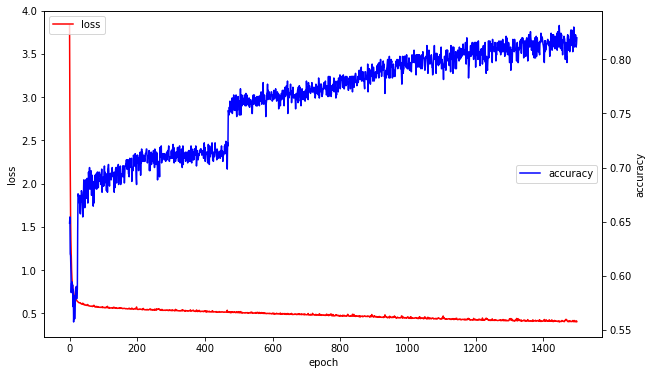

In [14]:
# 모델의 학습과정 표시하기 (validation set이 없는 경우)
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'r', label='loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축 공유
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [15]:
# 모델 평가하기
score = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.7794


In [16]:
print("loss : %s, accuracy : %s" % (score[0], score[1]))

loss : 0.6914612054824829, accuracy : 0.779411792755127


# 6. 모델 사용하기

In [17]:
model.predict(np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]]))

array([[0.6391671]], dtype=float32)

*피마 인디언 당뇨발병 예측 (위는 binary classification 이여서 원핫인코딩을 안함) 원핫인코딩 사용한 예측 - 각자 해보기*
1. 데이터셋 가져와 훈련셋, 검증셋, 훈련셋, 독립변수와 타겟변수. 타겟변수는 원핫인코딩
2. 모델생성(input_dim = 8, 최종 출력=2, activation function에 softmax)
3. 모델 학습과정 설정(loss="categorical_crossentropy)
4. 모델 학습하기
5. 모델 평가하기
6. 모델사용하기

In [1]:
import numpy as np  # csv 파일을 numpy 배열로 읽기
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터셋 가져와 훈련셋, 검증셋, 훈련셋, 독립변수와 타겟변수. 타겟변수는 원핫인코딩
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [5]:
# 학습용 데이터(훈련데이터=훈련셋)
x_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
# 검증용 데이터(validation 셋)
x_val   = dataset[600:700, :-1]
y_val   = dataset[600:700, -1]
# 테스트 데이터(시험데이터=시험셋)
x_test  = dataset[700:, :-1]
y_test  = dataset[700:, -1]
# 원핫인코딩
y_train = utils.to_categorical(y_train, 2)
y_val = utils.to_categorical(y_val, 2)
y_test = utils.to_categorical(y_test, 2)
print('훈련셋 :',x_train.shape, y_train.shape)
print('검증셋 :',x_val.shape, y_val.shape)
print('테스트셋 :',x_test.shape, y_test.shape)

훈련셋 : (600, 8) (600, 2)
검증셋 : (100, 8) (100, 2)
테스트셋 : (68, 8) (68, 2)


In [6]:
# 2. 모델생성(input_dim = 8, 최종 출력=2, activation function에 softmax)
model2 = Sequential()
# input_dim은 8, 최종 출력 2
model2.add(Dense(12, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [7]:
# 3. 학습과정 설정
# model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
hist = model2.fit(x_train, y_train, epochs=1500, batch_size=64,
                validation_data=(x_val, y_val))

Epoch 1/1500
10/10 [==============================] - 0s 15ms/step - loss: 28.4953 - accuracy: 0.6567 - val_loss: 23.1007 - val_accuracy: 0.6100
Epoch 2/1500
10/10 [==============================] - 0s 3ms/step - loss: 21.2238 - accuracy: 0.6517 - val_loss: 17.3089 - val_accuracy: 0.5900
Epoch 3/1500
10/10 [==============================] - 0s 3ms/step - loss: 15.8170 - accuracy: 0.6250 - val_loss: 13.2132 - val_accuracy: 0.5500
Epoch 4/1500
10/10 [==============================] - 0s 3ms/step - loss: 11.8068 - accuracy: 0.5717 - val_loss: 10.2147 - val_accuracy: 0.5000
Epoch 5/1500
10/10 [==============================] - 0s 3ms/step - loss: 8.7407 - accuracy: 0.5400 - val_loss: 8.0524 - val_accuracy: 0.5300
Epoch 6/1500
10/10 [==============================] - 0s 3ms/step - loss: 6.8795 - accuracy: 0.4750 - val_loss: 6.6052 - val_accuracy: 0.4600
Epoch 7/1500
10/10 [==============================] - 0s 3ms/step - loss: 5.3994 - accuracy: 0.4883 - val_loss: 5.1206 - val_accuracy: 0.49

10/10 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.7183 - val_loss: 0.5367 - val_accuracy: 0.7300
Epoch 116/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7150 - val_loss: 0.5487 - val_accuracy: 0.6900
Epoch 117/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.7033 - val_loss: 0.5369 - val_accuracy: 0.7300
Epoch 118/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5932 - accuracy: 0.6967 - val_loss: 0.5338 - val_accuracy: 0.7600
Epoch 119/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.6950 - val_loss: 0.5301 - val_accuracy: 0.7600
Epoch 120/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7083 - val_loss: 0.5299 - val_accuracy: 0.7600
Epoch 121/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.7017 - val_loss: 0.5357 - val_accuracy: 0.7200
Epoch 1

Epoch 172/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5465 - accuracy: 0.7267 - val_loss: 0.5182 - val_accuracy: 0.7500
Epoch 173/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.7183 - val_loss: 0.5298 - val_accuracy: 0.7400
Epoch 174/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7117 - val_loss: 0.5407 - val_accuracy: 0.6900
Epoch 175/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 0.7183 - val_loss: 0.6563 - val_accuracy: 0.6300
Epoch 176/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7300 - val_loss: 0.5915 - val_accuracy: 0.6600
Epoch 177/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.7400 - val_loss: 0.5768 - val_accuracy: 0.7200
Epoch 178/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.7417 - val_loss: 0.5238 - val_accuracy:

Epoch 229/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7333 - val_loss: 0.5123 - val_accuracy: 0.7700
Epoch 230/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.7417 - val_loss: 0.4989 - val_accuracy: 0.7700
Epoch 231/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7600 - val_loss: 0.5078 - val_accuracy: 0.7600
Epoch 232/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7333 - val_loss: 0.5007 - val_accuracy: 0.7600
Epoch 233/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7400 - val_loss: 0.5302 - val_accuracy: 0.7200
Epoch 234/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7350 - val_loss: 0.5042 - val_accuracy: 0.7500
Epoch 235/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7400 - val_loss: 0.4999 - val_accuracy:

Epoch 286/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7350 - val_loss: 0.5800 - val_accuracy: 0.7100
Epoch 287/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7317 - val_loss: 0.5416 - val_accuracy: 0.7100
Epoch 288/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5110 - accuracy: 0.7417 - val_loss: 0.4925 - val_accuracy: 0.7800
Epoch 289/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7617 - val_loss: 0.5535 - val_accuracy: 0.7200
Epoch 290/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7250 - val_loss: 0.6598 - val_accuracy: 0.6500
Epoch 291/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7150 - val_loss: 0.4875 - val_accuracy: 0.7900
Epoch 292/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.7433 - val_loss: 0.4951 - val_accuracy:

Epoch 399/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7483 - val_loss: 0.5259 - val_accuracy: 0.7300
Epoch 400/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7650 - val_loss: 0.4846 - val_accuracy: 0.8100
Epoch 401/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7667 - val_loss: 0.4823 - val_accuracy: 0.8200
Epoch 402/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7550 - val_loss: 0.5691 - val_accuracy: 0.7200
Epoch 403/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7650 - val_loss: 0.4973 - val_accuracy: 0.8000
Epoch 404/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7650 - val_loss: 0.4816 - val_accuracy: 0.8200
Epoch 405/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.7650 - val_loss: 0.4803 - val_accuracy:

Epoch 456/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7483 - val_loss: 0.4988 - val_accuracy: 0.7600
Epoch 457/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7467 - val_loss: 0.5321 - val_accuracy: 0.7300
Epoch 458/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7417 - val_loss: 0.4798 - val_accuracy: 0.8000
Epoch 459/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7500 - val_loss: 0.4747 - val_accuracy: 0.8200
Epoch 460/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7633 - val_loss: 0.4764 - val_accuracy: 0.7800
Epoch 461/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7667 - val_loss: 0.4759 - val_accuracy: 0.8100
Epoch 462/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7767 - val_loss: 0.4916 - val_accuracy:

Epoch 569/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7817 - val_loss: 0.4932 - val_accuracy: 0.7800
Epoch 570/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7733 - val_loss: 0.4669 - val_accuracy: 0.8100
Epoch 571/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7750 - val_loss: 0.4708 - val_accuracy: 0.7900
Epoch 572/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7883 - val_loss: 0.4814 - val_accuracy: 0.7600
Epoch 573/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.7717 - val_loss: 0.4727 - val_accuracy: 0.7900
Epoch 574/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7700 - val_loss: 0.4719 - val_accuracy: 0.7800
Epoch 575/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7750 - val_loss: 0.5221 - val_accuracy:

Epoch 682/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.7833 - val_loss: 0.4849 - val_accuracy: 0.7700
Epoch 683/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.7817 - val_loss: 0.4660 - val_accuracy: 0.8100
Epoch 684/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7850 - val_loss: 0.4755 - val_accuracy: 0.7600
Epoch 685/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7867 - val_loss: 0.5236 - val_accuracy: 0.7400
Epoch 686/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7567 - val_loss: 0.5304 - val_accuracy: 0.7200
Epoch 687/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7633 - val_loss: 0.5064 - val_accuracy: 0.7600
Epoch 688/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7767 - val_loss: 0.4706 - val_accuracy:

Epoch 739/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7783 - val_loss: 0.4719 - val_accuracy: 0.7800
Epoch 740/1500
10/10 [==============================] - 0s 6ms/step - loss: 0.4637 - accuracy: 0.7817 - val_loss: 0.4643 - val_accuracy: 0.8100
Epoch 741/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.7867 - val_loss: 0.4903 - val_accuracy: 0.7800
Epoch 742/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.7800 - val_loss: 0.4701 - val_accuracy: 0.8000
Epoch 743/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.7733 - val_loss: 0.4753 - val_accuracy: 0.7700
Epoch 744/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.7850 - val_loss: 0.5061 - val_accuracy: 0.7500
Epoch 745/1500
10/10 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.7717 - val_loss: 0.4893 - val_accuracy:

Epoch 796/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7667 - val_loss: 0.4848 - val_accuracy: 0.7700
Epoch 797/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7717 - val_loss: 0.4722 - val_accuracy: 0.7900
Epoch 798/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.7633 - val_loss: 0.4697 - val_accuracy: 0.7800
Epoch 799/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.7800 - val_loss: 0.4782 - val_accuracy: 0.7900
Epoch 800/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7817 - val_loss: 0.4595 - val_accuracy: 0.8000
Epoch 801/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7700 - val_loss: 0.4603 - val_accuracy: 0.7900
Epoch 802/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7717 - val_loss: 0.4608 - val_accuracy:

Epoch 853/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7783 - val_loss: 0.4673 - val_accuracy: 0.8000
Epoch 854/1500
10/10 [==============================] - ETA: 0s - loss: 0.4755 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4583 - accuracy: 0.7850 - val_loss: 0.4645 - val_accuracy: 0.8100
Epoch 855/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.7783 - val_loss: 0.4660 - val_accuracy: 0.7800
Epoch 856/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4476 - accuracy: 0.7883 - val_loss: 0.4791 - val_accuracy: 0.7900
Epoch 857/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7800 - val_loss: 0.5221 - val_accuracy: 0.7500
Epoch 858/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.7517 - val_loss: 0.5121 - val_accuracy: 0.7500
Epoch 859/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7767 - val_loss: 0.5374 - val_accuracy: 0.7200
Epoch 966/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.7883 - val_loss: 0.4616 - val_accuracy: 0.8000
Epoch 967/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7767 - val_loss: 0.4656 - val_accuracy: 0.7900
Epoch 968/1500
10/10 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.76 - 0s 3ms/step - loss: 0.4578 - accuracy: 0.7783 - val_loss: 0.5755 - val_accuracy: 0.7100
Epoch 969/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7517 - val_loss: 0.5049 - val_accuracy: 0.7500
Epoch 970/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.7233 - val_loss: 0.5903 - val_accuracy: 0.7000
Epoch 971/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7483 - val_l

10/10 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7600 - val_loss: 0.4936 - val_accuracy: 0.7800
Epoch 1078/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.7783 - val_loss: 0.4723 - val_accuracy: 0.8000
Epoch 1079/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.7850 - val_loss: 0.4626 - val_accuracy: 0.7900
Epoch 1080/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.7833 - val_loss: 0.4668 - val_accuracy: 0.8000
Epoch 1081/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7900 - val_loss: 0.4626 - val_accuracy: 0.7900
Epoch 1082/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7767 - val_loss: 0.5266 - val_accuracy: 0.7300
Epoch 1083/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7800 - val_loss: 0.4734 - val_accuracy: 0.7700
E

10/10 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7950 - val_loss: 0.4742 - val_accuracy: 0.7500
Epoch 1190/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.7883 - val_loss: 0.4860 - val_accuracy: 0.7700
Epoch 1191/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.7950 - val_loss: 0.4667 - val_accuracy: 0.7700
Epoch 1192/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7800 - val_loss: 0.4763 - val_accuracy: 0.7500
Epoch 1193/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7750 - val_loss: 0.4685 - val_accuracy: 0.7600
Epoch 1194/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.7800 - val_loss: 0.5124 - val_accuracy: 0.7600
Epoch 1195/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7800 - val_loss: 0.4650 - val_accuracy: 0.8000
E

10/10 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7767 - val_loss: 0.4653 - val_accuracy: 0.7900
Epoch 1302/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.7900 - val_loss: 0.4676 - val_accuracy: 0.7900
Epoch 1303/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7833 - val_loss: 0.4701 - val_accuracy: 0.7900
Epoch 1304/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.7817 - val_loss: 0.4680 - val_accuracy: 0.7700
Epoch 1305/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7850 - val_loss: 0.4662 - val_accuracy: 0.7700
Epoch 1306/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.7967 - val_loss: 0.4881 - val_accuracy: 0.7700
Epoch 1307/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7867 - val_loss: 0.4766 - val_accuracy: 0.7600
E

10/10 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.7867 - val_loss: 0.4791 - val_accuracy: 0.7500
Epoch 1414/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7883 - val_loss: 0.4647 - val_accuracy: 0.7900
Epoch 1415/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8017 - val_loss: 0.4672 - val_accuracy: 0.7800
Epoch 1416/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7900 - val_loss: 0.4791 - val_accuracy: 0.7600
Epoch 1417/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7967 - val_loss: 0.4668 - val_accuracy: 0.8000
Epoch 1418/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.7883 - val_loss: 0.4656 - val_accuracy: 0.7700
Epoch 1419/1500
10/10 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.8033 - val_loss: 0.4668 - val_accuracy: 0.7800
E

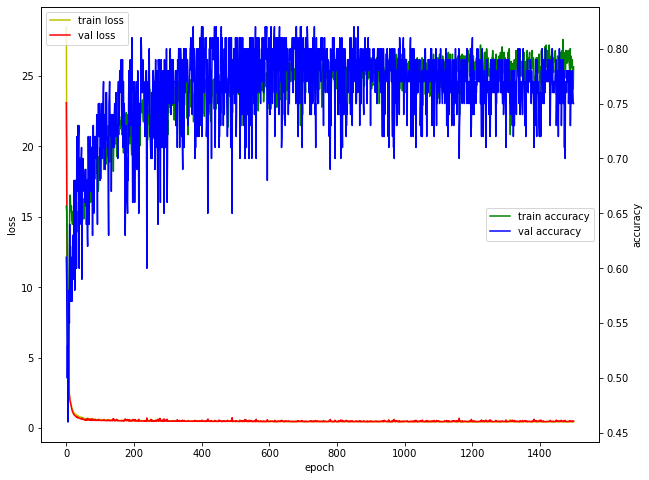

In [24]:
# 5. 모델의 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label="val loss")

acc_ax = loss_ax.twinx() #loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [25]:
# 모델 평가
score = model2.evaluate(x_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.7501 - accuracy: 0.7353


In [26]:
# 7. 모델 사용하기

In [27]:
x_train[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [28]:
model2.predict(np.array([[6,148,72,35,0,33.6,0.62,30]])).argmax()

1

In [29]:
model2.predict_classes(np.array([[6,148,72,35,0,33.6,0.62,30]]))

C:\Users\tjoeun707\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int64)